In [1]:
%matplotlib widget
from eomaps import Maps
import pandas as pd
import numpy as np

----------- create some example-data

In [2]:
lon, lat = np.meshgrid(np.arange(-20, 40, 0.25), np.arange(30, 60, 0.25))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat)
)
data = data.sample(15000)  # take 15000 random datapoints from the dataset
# ------------------------------------

D:\python_modules\eomaps\eomaps\eomaps.py:565: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!
  "EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') "


EOmaps: estimating radius...
EOmaps: The estimated radius is: 0.1250


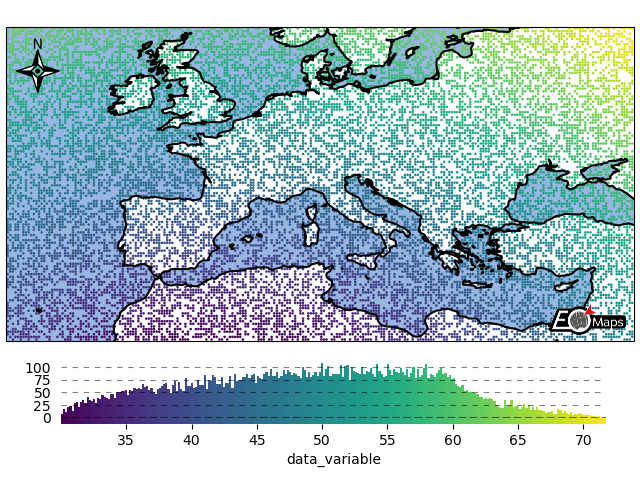

In [3]:
m = Maps(crs=4326)
m.add_feature.preset.ocean()
m.add_feature.preset.coastline()
m.set_data(
    data=data,  # a pandas-DataFrame holding the data & coordinates
    parameter="data_variable",  # the DataFrame-column you want to plot
    xcoord="lon",  # the name of the DataFrame-column representing the x-coordinates
    ycoord="lat",  # the name of the DataFrame-column representing the y-coordinates
    crs=4326,
)  # the coordinate-system of the x- and y- coordinates
m.plot_map()
m.add_colorbar()
c = m.add_compass((0.05, 0.86), 7, patch=None)
m.cb.pick.attach.annotate()  # attach a basic pick-annotation (on left-click)
m.add_logo()  # add a logo